In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import nltk

from nltk.probability import FreqDist

In [120]:
## Reading Json file for phone meta data and selecting only those records which belong to Cell phones by creating a new Json file 
with open("phone_meta_data","w") as file:    
    with open("meta_Cell_Phones_and_Accessories.json") as lines:
        for line in lines:
            r=json.loads(line.rstrip())
            if "Cell Phones & Accessories" == r["main_cat"]:
                file.write(line)
             

In [3]:
import pandas as pd
df_meta=pd.read_json("phone_meta_data",lines=True)
df_meta.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710
1,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Camo Duck Grass Rubberized Hard Case Phone Fac...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,997,672 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6789300104
3,"[Cell Phones & Accessories, Accessories, Acces...",,"[A brand-new, unused, unopened, undamaged item...",,Camoflague Camo Usa Deer Combo Hybrid Hard Cas...,[],[],,Samsung,[Protect your phone with style through this At...,"[>#2,773,172 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501052
4,[],,[Product Description\nThe best just got better...,,Motorola H700 Black - Non-Retail Packaging,[],[],,Motorola,[],[],[],{},Cell Phones & Accessories,,,,7030131746


In [4]:
df_meta=df_meta[df_meta["main_cat"]=="Cell Phones & Accessories"]
df_meta.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710
1,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Camo Duck Grass Rubberized Hard Case Phone Fac...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,997,672 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6789300104
3,"[Cell Phones & Accessories, Accessories, Acces...",,"[A brand-new, unused, unopened, undamaged item...",,Camoflague Camo Usa Deer Combo Hybrid Hard Cas...,[],[],,Samsung,[Protect your phone with style through this At...,"[>#2,773,172 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501052
4,[],,[Product Description\nThe best just got better...,,Motorola H700 Black - Non-Retail Packaging,[],[],,Motorola,[],[],[],{},Cell Phones & Accessories,,,,7030131746


In [5]:
df_meta=df_meta.drop_duplicates(subset="asin") ## Dropping duplicate values of asin in meta data

In [6]:
df_phone=pd.read_csv('phone_data_final.csv',sep=",")   ## reading phone data csv file
df_phone

,Unnamed: 0,overall,verified,unixReviewTime,reviewerID,asin,reviewText,category,also_view,brand,price,cleaned_reviewText,review_sentiment,Date&Time
0,0,1,False,1095724800,A5JLAU2ARJ0BO,B0000E3GWH,This phone is ugly and heavy and has a terribl...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,phone ugly heavy terrible user interface techi...,NEGATIVE,20-09-2004
1,1,4,False,1090627200,A1ACM1CBGORBN1,B0000E3GWH,I had the Samsung V205 and then I decided to t...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,samsung v205 decided try e715 fyi people batte...,POSITIVE,23-07-2004
2,2,3,False,1089072000,A2V48Q03FZUOSD,B0000E3GWH,This is the first Samsung phone I have had and...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,samsung phone not measure v300 am tmobile cust...,NEGATIVE,05-07-2004
3,3,5,True,1081728000,A1V3TRGWOMA8LC,B0000E3GWH,"..and I'm from Europe, where the phones and ne...","['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,i'm europe phones networks better samsung curr...,POSITIVE,11-04-2004
4,4,3,False,1077148800,A3NOBH42C7UI5M,B0000E3GWH,This phone is amazingly small and light for a ...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,phone amazingly light camera phone flashlight ...,POSITIVE,18-02-2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61941,62086,5,True,1537056000,A3TDOO7WG0SS51,B01GYLZG6G,Price,"['Cell Phones & Accessories', 'Cell Phones', '...",[],DOOGEE,$27.57,price,NEGATIVE,15-09-2018
61942,62087,5,True,1504483200,A2HVSDMYQPAMUH,B01H42CNDI,Awesome thanks love it,"['Cell Phones & Accessories', 'Cell Phones', '...","['B00PHJI28G', 'B01CPIYNQG', 'B01NC2MEJP', 'B0...",Samsung,NaN,awesome thanks love,POSITIVE,03-09-2017
61943,62088,5,True,1536019200,A28EUF394DMX8,B01H93TCCM,Work fantastic. I haven't had any issues with ...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,$96.64,work fantastic haven't issues received yes ref...,POSITIVE,03-09-2018
61944,62089,2,True,1520121600,A2AN3O4ZTEBOXW,B01HDIRLC6,After about 8 to 9 months its useless. You ge...,"['Cell Phones & Accessories', 'Cell Phones', '...","['B076MM5LM7', 'B01FS0AAZG', 'B07C1VRLMT', 'B0...",NaN,NaN,8 9 months useless paid aj,NEGATIVE,03-03-2018


In [7]:
df_phone=df_phone.drop_duplicates(subset=["reviewText", "reviewerID", "asin"])  ## Dropping duplicate records of same reviewer id for same product

In [8]:
df_phone.shape

(61365, 14)

In [9]:
df=pd.merge(df_meta,df_phone,on="asin",how="inner") ## merging phone data and meta data
df.head()

,category_x,tech1,description,fit,title,also_buy,image,tech2,brand_x,feature,...,unixReviewTime,reviewerID,reviewText,category_y,also_view_y,brand_y,price_y,cleaned_reviewText,review_sentiment,Date&Time
0,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,1095724800,A5JLAU2ARJ0BO,This phone is ugly and heavy and has a terribl...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,phone ugly heavy terrible user interface techi...,NEGATIVE,20-09-2004
1,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,1090627200,A1ACM1CBGORBN1,I had the Samsung V205 and then I decided to t...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,samsung v205 decided try e715 fyi people batte...,POSITIVE,23-07-2004
2,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,1089072000,A2V48Q03FZUOSD,This is the first Samsung phone I have had and...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,samsung phone not measure v300 am tmobile cust...,NEGATIVE,05-07-2004
3,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,1081728000,A1V3TRGWOMA8LC,"..and I'm from Europe, where the phones and ne...","['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,i'm europe phones networks better samsung curr...,POSITIVE,11-04-2004
4,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,1077148800,A3NOBH42C7UI5M,This phone is amazingly small and light for a ...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,phone amazingly light camera phone flashlight ...,POSITIVE,18-02-2004


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60922 entries, 0 to 60921
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category_x          60922 non-null  object
 1   tech1               60922 non-null  object
 2   description         60922 non-null  object
 3   fit                 60922 non-null  object
 4   title               60922 non-null  object
 5   also_buy            60922 non-null  object
 6   image               60922 non-null  object
 7   tech2               60922 non-null  object
 8   brand_x             60922 non-null  object
 9   feature             60922 non-null  object
 10  rank                60922 non-null  object
 11  also_view_x         60922 non-null  object
 12  details             60922 non-null  object
 13  main_cat            60922 non-null  object
 14  similar_item        60922 non-null  object
 15  date                60922 non-null  object
 16  price_x             60

In [11]:
df["unixReviewTime"]=pd.to_datetime(df["unixReviewTime"],unit="s") ## converted unixtime stamp to date time
df.head()

,category_x,tech1,description,fit,title,also_buy,image,tech2,brand_x,feature,...,unixReviewTime,reviewerID,reviewText,category_y,also_view_y,brand_y,price_y,cleaned_reviewText,review_sentiment,Date&Time
0,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,2004-09-21,A5JLAU2ARJ0BO,This phone is ugly and heavy and has a terribl...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,phone ugly heavy terrible user interface techi...,NEGATIVE,20-09-2004
1,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,2004-07-24,A1ACM1CBGORBN1,I had the Samsung V205 and then I decided to t...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,samsung v205 decided try e715 fyi people batte...,POSITIVE,23-07-2004
2,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,2004-07-06,A2V48Q03FZUOSD,This is the first Samsung phone I have had and...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,samsung phone not measure v300 am tmobile cust...,NEGATIVE,05-07-2004
3,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,2004-04-12,A1V3TRGWOMA8LC,"..and I'm from Europe, where the phones and ne...","['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,i'm europe phones networks better samsung curr...,POSITIVE,11-04-2004
4,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,2004-02-19,A3NOBH42C7UI5M,This phone is amazingly small and light for a ...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,phone amazingly light camera phone flashlight ...,POSITIVE,18-02-2004


In [13]:
df["Date&Time"]=pd.to_datetime(df["Date&Time"],format="%d%m%y") ##converting Date&Time column to date time format
df.head()

,category_x,tech1,description,fit,title,also_buy,image,tech2,brand_x,feature,...,unixReviewTime,reviewerID,reviewText,category_y,also_view_y,brand_y,price_y,cleaned_reviewText,review_sentiment,Date&Time
0,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,2004-09-21,A5JLAU2ARJ0BO,This phone is ugly and heavy and has a terribl...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,phone ugly heavy terrible user interface techi...,NEGATIVE,2004-09-20
1,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,2004-07-24,A1ACM1CBGORBN1,I had the Samsung V205 and then I decided to t...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,samsung v205 decided try e715 fyi people batte...,POSITIVE,2004-07-23
2,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,2004-07-06,A2V48Q03FZUOSD,This is the first Samsung phone I have had and...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,samsung phone not measure v300 am tmobile cust...,NEGATIVE,2004-05-07
3,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,2004-04-12,A1V3TRGWOMA8LC,"..and I'm from Europe, where the phones and ne...","['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,i'm europe phones networks better samsung curr...,POSITIVE,2004-11-04
4,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Compatible with T-Mobile cellular service, Sa...",,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],...,2004-02-19,A3NOBH42C7UI5M,This phone is amazingly small and light for a ...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,phone amazingly light camera phone flashlight ...,POSITIVE,2004-02-18


In [14]:
df=df.drop("price_y",axis=1)  ## since price columns has more than 50%  null values it will disturb our analysis.

In [15]:
## dropping columns with blank values and the duplicate of common columns between phone data and meta data.
## Also since we are only dealing with phones hence we no longer need category and main_cat cloumns.
df=df.drop(["brand_x","Unnamed: 0","tech1","tech2","image","fit","price_x","also_view_x","category_x","category_y","category_x","main_cat"],axis=1)

In [16]:
df.head()

,description,title,also_buy,feature,rank,details,similar_item,date,asin,overall,verified,unixReviewTime,reviewerID,reviewText,also_view_y,brand_y,cleaned_reviewText,review_sentiment,Date&Time
0,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[],"[>#3,059,436 in Cell Phones & Accessories (See...",{},,,B0000E3GWH,1,False,2004-09-21,A5JLAU2ARJ0BO,This phone is ugly and heavy and has a terribl...,[],Samsung,phone ugly heavy terrible user interface techi...,NEGATIVE,2004-09-20
1,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[],"[>#3,059,436 in Cell Phones & Accessories (See...",{},,,B0000E3GWH,4,False,2004-07-24,A1ACM1CBGORBN1,I had the Samsung V205 and then I decided to t...,[],Samsung,samsung v205 decided try e715 fyi people batte...,POSITIVE,2004-07-23
2,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[],"[>#3,059,436 in Cell Phones & Accessories (See...",{},,,B0000E3GWH,3,False,2004-07-06,A2V48Q03FZUOSD,This is the first Samsung phone I have had and...,[],Samsung,samsung phone not measure v300 am tmobile cust...,NEGATIVE,2004-05-07
3,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[],"[>#3,059,436 in Cell Phones & Accessories (See...",{},,,B0000E3GWH,5,True,2004-04-12,A1V3TRGWOMA8LC,"..and I'm from Europe, where the phones and ne...",[],Samsung,i'm europe phones networks better samsung curr...,POSITIVE,2004-11-04
4,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[],"[>#3,059,436 in Cell Phones & Accessories (See...",{},,,B0000E3GWH,3,False,2004-02-19,A3NOBH42C7UI5M,This phone is amazingly small and light for a ...,[],Samsung,phone amazingly light camera phone flashlight ...,POSITIVE,2004-02-18


In [17]:
df=df.dropna(subset="cleaned_reviewText",axis=0)   ## droppping the row with no cleaned review text
df.cleaned_reviewText.isnull().sum()

0

In [18]:
df.isnull().sum()*100/len(df)

description           0.000000
title                 0.000000
also_buy              0.000000
feature               0.000000
rank                  0.000000
details               0.000000
similar_item          0.000000
date                  0.000000
asin                  0.000000
overall               0.000000
verified              0.000000
unixReviewTime        0.000000
reviewerID            0.000000
reviewText            0.000000
also_view_y           0.000000
brand_y               0.108337
cleaned_reviewText    0.000000
review_sentiment      0.000000
Date&Time             0.000000
dtype: float64

In [19]:
df.shape

(60921, 19)

In [20]:
df=df.dropna(subset="brand_y",axis=0)      ##droppping rows having null values for brand since the null values for that are only 0.11%
df.head()

,description,title,also_buy,feature,rank,details,similar_item,date,asin,overall,verified,unixReviewTime,reviewerID,reviewText,also_view_y,brand_y,cleaned_reviewText,review_sentiment,Date&Time
0,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[],"[>#3,059,436 in Cell Phones & Accessories (See...",{},,,B0000E3GWH,1,False,2004-09-21,A5JLAU2ARJ0BO,This phone is ugly and heavy and has a terribl...,[],Samsung,phone ugly heavy terrible user interface techi...,NEGATIVE,2004-09-20
1,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[],"[>#3,059,436 in Cell Phones & Accessories (See...",{},,,B0000E3GWH,4,False,2004-07-24,A1ACM1CBGORBN1,I had the Samsung V205 and then I decided to t...,[],Samsung,samsung v205 decided try e715 fyi people batte...,POSITIVE,2004-07-23
2,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[],"[>#3,059,436 in Cell Phones & Accessories (See...",{},,,B0000E3GWH,3,False,2004-07-06,A2V48Q03FZUOSD,This is the first Samsung phone I have had and...,[],Samsung,samsung phone not measure v300 am tmobile cust...,NEGATIVE,2004-05-07
3,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[],"[>#3,059,436 in Cell Phones & Accessories (See...",{},,,B0000E3GWH,5,True,2004-04-12,A1V3TRGWOMA8LC,"..and I'm from Europe, where the phones and ne...",[],Samsung,i'm europe phones networks better samsung curr...,POSITIVE,2004-11-04
4,"[Compatible with T-Mobile cellular service, Sa...",Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],[],"[>#3,059,436 in Cell Phones & Accessories (See...",{},,,B0000E3GWH,3,False,2004-02-19,A3NOBH42C7UI5M,This phone is amazingly small and light for a ...,[],Samsung,phone amazingly light camera phone flashlight ...,POSITIVE,2004-02-18


In [ ]:
## Exporting a clean and relevant excel file for further use in Tableau.
with pd.ExcelWriter("Merged_clean_data.xlsx") as writer:
    df.to_excel(writer, sheet_name="Sheet1")
    

## EDA

In [21]:
## Top 10 Brands based on total reviews (products) written.

total_share=df.groupby(by="brand_y").count()
total_share["share_percent"]=total_share.iloc[:,1]*100/len(df)  ## A new column containing the total market shre if each brand
total_share=total_share.sort_values(by="share_percent",ascending=False).head(10)
total_share

,description,title,also_buy,feature,rank,details,similar_item,date,asin,overall,verified,unixReviewTime,reviewerID,reviewText,also_view_y,cleaned_reviewText,review_sentiment,Date&Time,share_percent
brand_y,,,,,,,,,,,,,,,,,,,
Samsung,15773,15773,15773,15773,15773,15773,15773,15773,15773,15773,15773,15773,15773,15773,15773,15773,15773,15773,25.918988
BLU,9116,9116,9116,9116,9116,9116,9116,9116,9116,9116,9116,9116,9116,9116,9116,9116,9116,9116,14.979870
LG,6464,6464,6464,6464,6464,6464,6464,6464,6464,6464,6464,6464,6464,6464,6464,6464,6464,6464,10.621970
Motorola,4535,4535,4535,4535,4535,4535,4535,4535,4535,4535,4535,4535,4535,4535,4535,4535,4535,4535,7.452140
Nokia,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,7.036398
Apple,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,3590,5.899269
BlackBerry,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,3547,5.828609
HTC,2424,2424,2424,2424,2424,2424,2424,2424,2424,2424,2424,2424,2424,2424,2424,2424,2424,2424,3.983239
Sony,1541,1541,1541,1541,1541,1541,1541,1541,1541,1541,1541,1541,1541,1541,1541,1541,1541,1541,2.532249


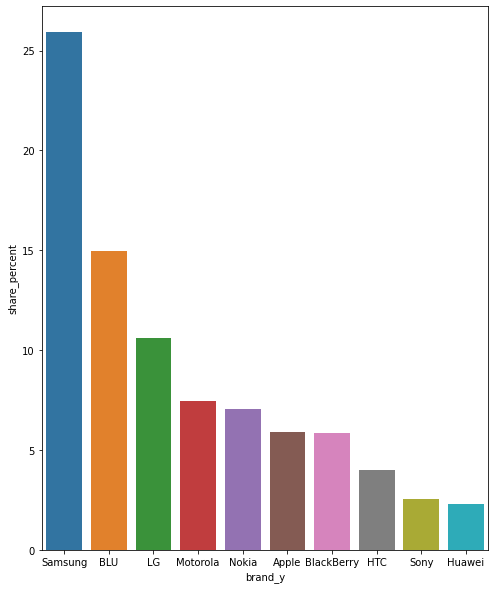

In [22]:

plt.title("Market Share of Top 10 Brands")
plt.figure(figsize=(8,10))
sns.barplot(x=total_share.index, y=total_share["share_percent"])
plt.close(1)
plt.show()

## Samsung has the highest market share 

In [23]:
## Creating a pivot table to check the average overall score of top 10 brands
overall_rating=pd.pivot_table(df,index="brand_y",values=["overall","reviewerID"],aggfunc={"overall":"mean","reviewerID":"count"})
overall_rating=overall_rating.sort_values("reviewerID",ascending=False).head(10)

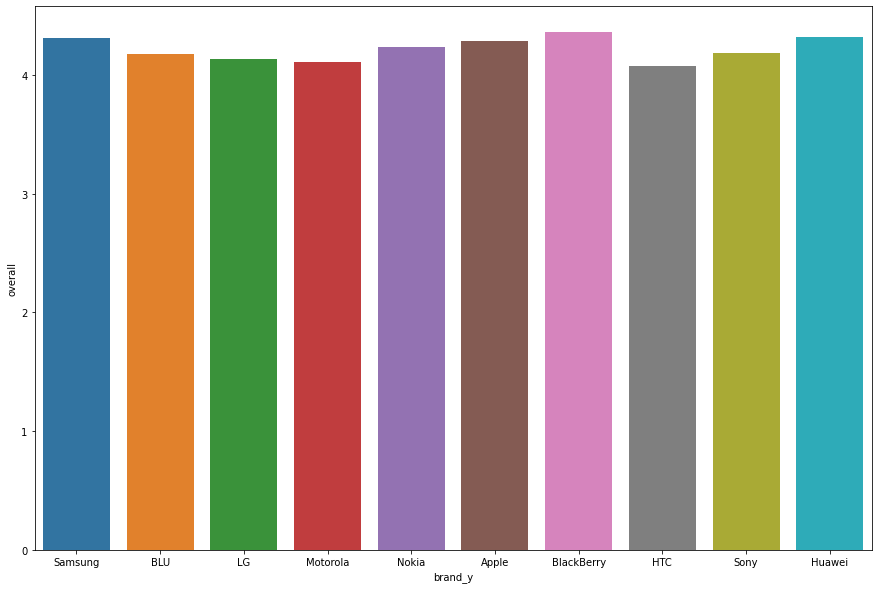

In [24]:
plt.title("Top 10 Selling Brands and their Mean Overall Score")
plt.figure(figsize=(15,10))
sns.barplot(x=overall_rating.index,y=overall_rating["overall"])
plt.close(1)
plt.show()

## Blackberry has the highest average overall score of 4.36

In [25]:
## creating pivot table to find out the positive review rate of each brand

review_rate=pd.pivot_table(df,index="brand_y",columns="review_sentiment",values="asin",aggfunc="count") 
review_rate=review_rate.sort_values("POSITIVE", ascending=False)
review_rate["total_reviews"]=review_rate.iloc[:,0]+review_rate.iloc[:,1]
review_rate


review_sentiment,NEGATIVE,POSITIVE,total_reviews
brand_y,,,
Samsung,3930.0,11843.0,15773.0
BLU,2506.0,6610.0,9116.0
LG,1526.0,4938.0,6464.0
Motorola,1045.0,3490.0,4535.0
Nokia,879.0,3403.0,4282.0
...,...,...,...
0,2.0,3.0,5.0
Virgin Mobile Slice,3.0,2.0,5.0
Amar,3.0,2.0,5.0


In [26]:
review_rate["positive_rate"]=review_rate.iloc[:,1]*100/review_rate["total_reviews"]
review_rate=review_rate.sort_values("total_reviews",ascending=False).head(10)  
 
review_rate    ## Top selling brands and their Positive Review Rate.
               ## positive_rate= no. of positive reviews/total reviews of a particualr brand 

review_sentiment,NEGATIVE,POSITIVE,total_reviews,positive_rate
brand_y,,,,
Samsung,3930.0,11843.0,15773.0,75.084004
BLU,2506.0,6610.0,9116.0,72.509873
LG,1526.0,4938.0,6464.0,76.392327
Motorola,1045.0,3490.0,4535.0,76.957001
Nokia,879.0,3403.0,4282.0,79.472209
Apple,958.0,2632.0,3590.0,73.314763
BlackBerry,1212.0,2335.0,3547.0,65.830279
HTC,508.0,1916.0,2424.0,79.042904
Sony,334.0,1207.0,1541.0,78.325762


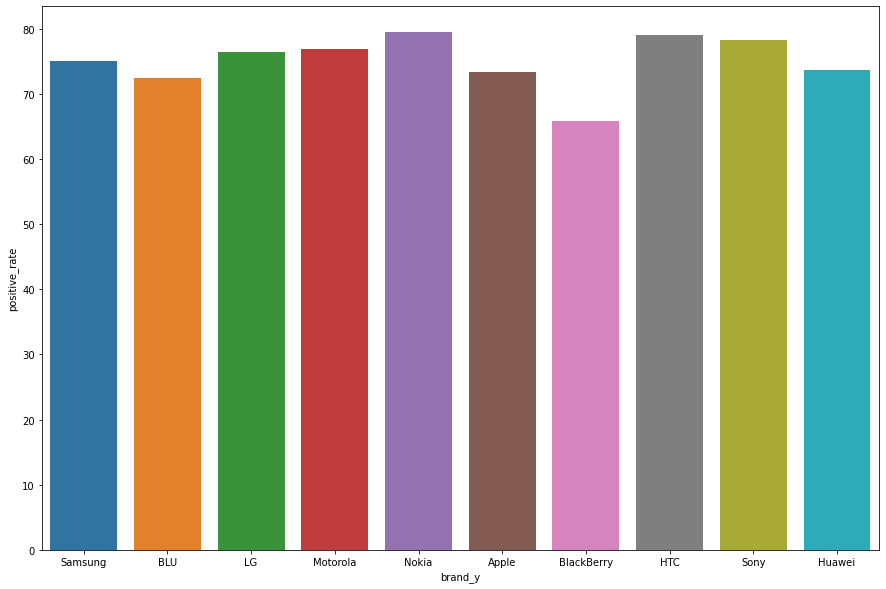

In [27]:
plt.title("Top Selling Brand's Positive Review Rate")
plt.figure(figsize=(15, 10))
sns.barplot(x=review_rate.index,y=review_rate["positive_rate"])
plt.close(1)
plt.show()

##  Nokia has the highest Positive review rate of 79.04%

In [28]:
df_pos=df[df["review_sentiment"]=="POSITIVE"] ##creating seperate dataframe for Positive and Negative reviews
df_neg=df[df["review_sentiment"]=="NEGATIVE"]

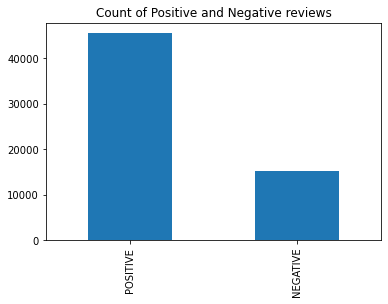

In [29]:
plt.title("Count of Positive and Negative reviews")
df.review_sentiment.value_counts().plot.bar()
plt.show()

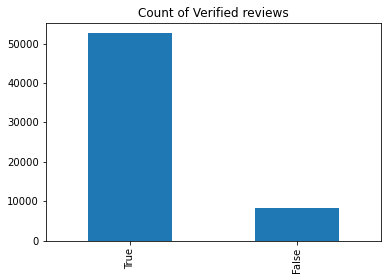

In [30]:
plt.title("Count of Verified reviews")
df.verified.value_counts().plot.bar()
plt.show()
## 

In [33]:

## Creating a pivot table to find out which brand has the highest verified review rate

verified_rate=pd.pivot_table(df,index="brand_y",columns="verified",values="asin",aggfunc="count") 
verified_rate=verified_rate.sort_values(True, ascending=False)
verified_rate["total_reviews"]=verified_rate.iloc[:,0]+verified_rate.iloc[:,1]
verified_rate


verified,False,True,total_reviews
brand_y,,,
Samsung,2075.0,13698.0,15773.0
BLU,836.0,8280.0,9116.0
LG,1107.0,5357.0,6464.0
Motorola,635.0,3900.0,4535.0
Nokia,804.0,3478.0,4282.0
...,...,...,...
RugGear,4.0,2.0,6.0
Palm Treo 650,4.0,2.0,6.0
Acer,8.0,1.0,9.0


In [34]:
verified_rate["true_rate"]=verified_rate.iloc[:,1]*100/review_rate["total_reviews"]
verified_rate=verified_rate.sort_values("true_rate",ascending=False).head(10)  
verified_rate

verified,False,True,total_reviews,true_rate
brand_y,,,,
Apple,159.0,3431.0,3590.0,95.571031
BLU,836.0,8280.0,9116.0,90.829311
BlackBerry,420.0,3127.0,3547.0,88.159008
Samsung,2075.0,13698.0,15773.0,86.844608
Motorola,635.0,3900.0,4535.0,85.997795
Huawei,208.0,1179.0,1387.0,85.003605
Sony,245.0,1296.0,1541.0,84.101233
LG,1107.0,5357.0,6464.0,82.874381
HTC,454.0,1970.0,2424.0,81.270627


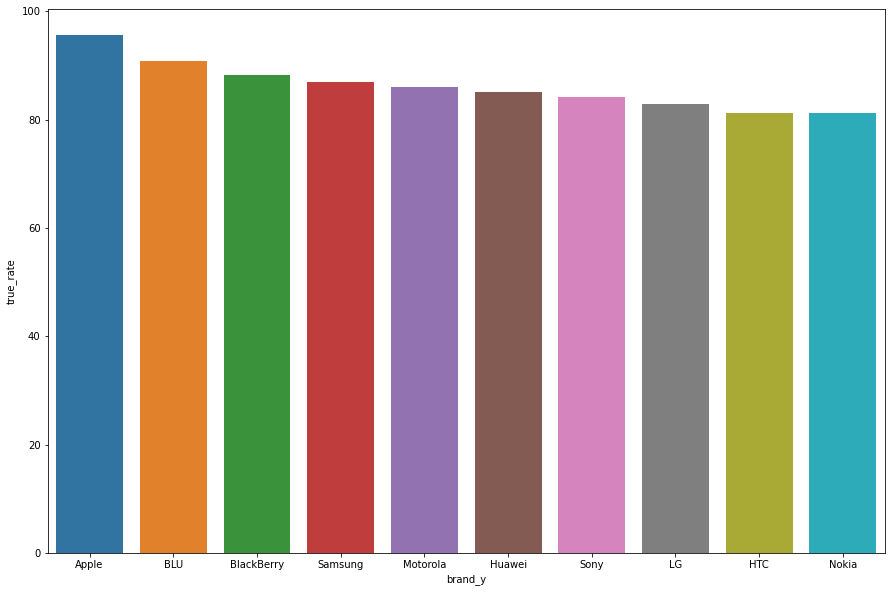

In [36]:
plt.title("Top Selling Brand's Verified Review Rate")
plt.figure(figsize=(15, 10))
sns.barplot(x=verified_rate.index,y=verified_rate["true_rate"])
plt.close(1)
plt.show()

## Apple has the most verified review rate of 95.57%

In [37]:
df_pos.title.value_counts().head(10)

Samsung Galaxy S5, White 16GB (AT&amp;T)                                                                                  626
Nokia Lumia 520 (AT&amp;T Go Phone) No Annual Contract (Discontinued by Manufacturer)                                     539
BLU Advance 4.0 Unlocked Cellphone, Black                                                                                 515
Samsung Galaxy S3 Mini GT-i8190 GSM Unlocked International Version White - NO WARRANTY                                    453
Motorola Moto G (2nd generation) Unlocked Cellphone, 8GB, White                                                           429
Nokia Lumia 521 T-Mobile Windows 8 4G Smartphone - White                                                                  341
Huawei Nexus 6p 128GB - Factory Unlocked Phone - Frost                                                                    313
Samsung Galaxy S4 Mini Duos GT-i9192 Factory Unlocked International GSM Dual Sim Cell Phone - Retail Packaging - Black

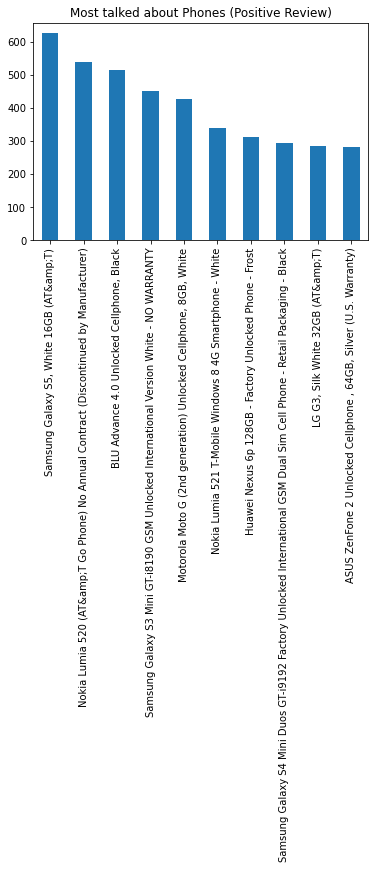

In [38]:
plt.title("Most talked about Phones (Positive Review)")
df_pos.title.value_counts().head(10).plot.bar()
plt.show()
## Among the top 10 talked about phones samsung has 4 phones. 

In [39]:
## creating a dataframe for only top 10 most reviewed/sold phones
df_top_phones=df[df["title"].isin(["BLU Advance 4.0 Unlocked Cellphone, Black ","Samsung Galaxy S5, White 16GB (AT&amp;T)","Samsung Galaxy S3 Mini GT-i8190 GSM Unlocked International Version White - NO WARRANTY","Nokia Lumia 520 (AT&amp;T Go Phone) No Annual Contract (Discontinued by Manufacturer)","Motorola Moto G (2nd generation) Unlocked Cellphone, 8GB, White","Samsung Galaxy S4 Mini Duos GT-i9192 Factory Unlocked International GSM Dual Sim Cell Phone - Retail Packaging - Black","Nokia Lumia 521 T-Mobile Windows 8 4G Smartphone - White","Huawei Nexus 6p 128GB - Factory Unlocked Phone - Frost","ASUS ZenFone 2 Unlocked Cellphone , 64GB, Silver (U.S. Warranty)","Samsung Galaxy S3 i9300 16GB - Factory Unlocked International Version Blue- NO WARRANTY"])]

In [40]:
df_top_phones=df_top_phones.drop_duplicates(subset="title")

In [41]:
df_top_phones.head()

,description,title,also_buy,feature,rank,details,similar_item,date,asin,overall,verified,unixReviewTime,reviewerID,reviewText,also_view_y,brand_y,cleaned_reviewText,review_sentiment,Date&Time
14343,[The GALAXY S3 mini runs Android 4.1 (Jelly Be...,Samsung Galaxy S3 Mini GT-i8190 GSM Unlocked I...,[],[GSM 850/900/1800/1900; HSDPA 900/1900/2100 mh...,"[>#88,548 in Cell Phones & Accessories (See To...",{},"class=""a-bordered a-horizontal-stripes a-spa...",,B00A29WCA0,5,True,2017-09-03,A2UMDKA221F32E,ok,"['B00LMJDP1Y', 'B00LXL6ZKO', 'B01NB1SXMZ', 'B0...",Samsung,ok,POSITIVE,2017-02-09
19381,"[, The Nokia Lumia 521 is a great device for t...",Nokia Lumia 521 T-Mobile Windows 8 4G Smartpho...,"[B00CRNV81S, B00EWUMAKC, B00D31QF1Q, B00D31PSJ...","[Height: 124 mm, Width: 64 mm, Thickness: 9.9 ...","[>#71,264 in Cell Phones & Accessories (See To...",{},"class=""a-bordered a-horizontal-stripes a-spa...",,B00COYOAYW,5,False,2013-05-18,A1GU6PSZG155ND,Cannot believe what I got.\nThis is like a dre...,[],Nokia,cannot believe got like dream true excellent p...,POSITIVE,2013-05-17
21802,[Samsung Galaxy S4 Mini I9190 Unlocked GSM And...,Samsung Galaxy S4 Mini Duos GT-i9192 Factory U...,[B01G4NJ8FY],"[A petite 4"" screen with Super AMOLED display,...","[>#140,818 in Cell Phones & Accessories (See T...",{},"class=""a-bordered a-horizontal-stripes a-spa...",,B00DRNEV9S,5,True,2017-07-27,A33AUKDHK49PTO,amazing,"['B00MWI4HW0', 'B00D8T9QZU', 'B01NB1SXMZ', 'B0...",Samsung,amazing,POSITIVE,2017-07-26
22818,"[Nokia Lumia 520 GoPhone (AT&T), The Lumia 520...",Nokia Lumia 520 (AT&amp;T Go Phone) No Annual ...,"[B00EO8SBHS, B00F4MWWMS, B01GM2S0VK, B00IYE1SU...","[Mobile Operating System: Windows Phone 8, Car...","[>#55,287 in Cell Phones & Accessories (See To...",{},"class=""a-bordered a-horizontal-stripes a-spa...",,B00E45043A,5,False,2013-07-31,AALL75OIKL631,selling at $90 for a dual core latest smart ph...,[],Nokia,selling 90 dual core smart phone cost 160 grea...,POSITIVE,2013-07-30
32352,"[Samsung Galaxy S5, White 16GB (AT&T), <div cl...","Samsung Galaxy S5, White 16GB (AT&amp;T)","[B01JCQGWSQ, B01CVF4TM6, B00IPGW2E8, B00IPGW3N...","[Display: 5.1-inches, Camera: 16-MP, Processor...","137,726 in Cell Phones & Accessories (",{},"class=""a-bordered a-horizontal-stripes a-spa...",,B00IZ1XJ3Q,5,False,2014-04-11,A3VVMIMMTYQV5F,"First off, I am not a professional reviewer, n...","['B00E6FGSHY', 'B017A59580', 'B00Z2XS25K', 'B0...",Samsung,am not professional reviewer nor am employed c...,POSITIVE,2014-10-04


In [42]:
## Importing NLP libraries 

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

pd.set_option('max_colwidth', 100)

In [43]:
## Removing the Html code from features
df_top_phones["feature"]=df_top_phones.feature.apply(lambda x :BeautifulSoup( ",".join(x)).get_text()) ## converting records in feature column into string to apply NLP to find exclusive features of the phone.

In [44]:
df_top_phones.head()

,description,title,also_buy,feature,rank,details,similar_item,date,asin,overall,verified,unixReviewTime,reviewerID,reviewText,also_view_y,brand_y,cleaned_reviewText,review_sentiment,Date&Time
14343,[The GALAXY S3 mini runs Android 4.1 (Jelly Bean)with a 4.0 display while maintaining the famili...,Samsung Galaxy S3 Mini GT-i8190 GSM Unlocked International Version White - NO WARRANTY,[],"GSM 850/900/1800/1900; HSDPA 900/1900/2100 mhz,Unlocked cell phones are compatible with GSM carr...","[>#88,548 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#1,390 in Ce...",{},"class=""a-bordered a-horizontal-stripes a-spacing-extra-large a-size-base comparison_table"">\n\...",,B00A29WCA0,5,True,2017-09-03,A2UMDKA221F32E,ok,"['B00LMJDP1Y', 'B00LXL6ZKO', 'B01NB1SXMZ', 'B00INEIZN4', 'B01EIVMETG', 'B00D8T9QZU', 'B00S3FEOAG...",Samsung,ok,POSITIVE,2017-02-09
19381,"[, The Nokia Lumia 521 is a great device for those looking for a budget-friendly smartphone runn...",Nokia Lumia 521 T-Mobile Windows 8 4G Smartphone - White,"[B00CRNV81S, B00EWUMAKC, B00D31QF1Q, B00D31PSJQ, B00LIWB34Q, B00JL9K9GQ, B00DAQFTFM, B00EO8SBHS,...","Height: 124 mm,Width: 64 mm,Thickness: 9.9 mm,Weight: 124.5 g,Display size: 4 ''","[>#71,264 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#213 in Cell...",{},"class=""a-bordered a-horizontal-stripes a-spacing-extra-large a-size-base comparison_table"">\n\...",,B00COYOAYW,5,False,2013-05-18,A1GU6PSZG155ND,Cannot believe what I got.\nThis is like a dream come true.\nAn excellent phone at an EXCELLENT ...,[],Nokia,cannot believe got like dream true excellent phone excellent price love phone love camera video ...,POSITIVE,2013-05-17
21802,"[Samsung Galaxy S4 Mini I9190 Unlocked GSM Android 4.2.2 Smartphone - 4.3"" Touchscreen, 8MP Rear...",Samsung Galaxy S4 Mini Duos GT-i9192 Factory Unlocked International GSM Dual Sim Cell Phone - Re...,[B01G4NJ8FY],"A petite 4"" screen with Super AMOLED display, which means vibrant amazing colour and clarity.,HD...","[>#140,818 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#2,036 in C...",{},"class=""a-bordered a-horizontal-stripes a-spacing-extra-large a-size-base comparison_table"">\n\...",,B00DRNEV9S,5,True,2017-07-27,A33AUKDHK49PTO,amazing,"['B00MWI4HW0', 'B00D8T9QZU', 'B01NB1SXMZ', 'B00MWI4F0O', 'B00S3FEOAG', 'B00OKTY3A0', 'B01GQWT4SE...",Samsung,amazing,POSITIVE,2017-07-26
22818,"[Nokia Lumia 520 GoPhone (AT&T), The Lumia 520 ships with Windows Phone 8.0 and is now eligible ...",Nokia Lumia 520 (AT&amp;T Go Phone) No Annual Contract (Discontinued by Manufacturer),"[B00EO8SBHS, B00F4MWWMS, B01GM2S0VK, B00IYE1SUA, B00LBFFSNM, B00EUH5M3O, B00EO8SCJA, B00DAQFTFM,...","Mobile Operating System: Windows Phone 8,Carrier: AT&T,Color: Not Available,Touch Screen: Yes,Bu...","[>#55,287 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#158 in Elec...",{},"class=""a-bordered a-horizontal-stripes a-spacing-extra-large a-size-base comparison_table"">\n\...",,B00E45043A,5,False,2013-07-31,AALL75OIKL631,"selling at $90 for a dual core latest smart phone with a cost of $160 , what a great deal, hurry...",[],Nokia,selling 90 dual core smart phone cost 160 great deal hurry won't highly recommend amazoners valu...,POSITIVE,2013-07-30
32352,"[Samsung Galaxy S5, White 16GB (AT&T), <div class=""aplus"" > <div class=""three-fourth-col"">, Stun...","Samsung Galaxy S5, White 16GB (AT&amp;T)","[B01JCQGWSQ, B01CVF4TM6, B00IPGW2E8, B00IPGW3NS, B00IPGW3L0, B01DW124NY, B017A59580, B01B4MMQ4K,...","Display: 5.1-inches,Camera: 16-MP,Processor Speed: 2.5 GHz,OS: Android 4.4.2 (KitKat)","137,726 in Cell Phones & Accessories (",{},"class=""a-bordered a-horizontal-stripes a-spacing-extra-large a-size-base comparison_table"">\n\...",,B00IZ1XJ3Q,5,False,2014-04-11,A3VVMIMMTYQV5F,"First off, I am not a professional reviewer, nor am I employed or compensated by Samsung or any ...","['B00E6FGSHY', 'B017A59580', 'B00Z2XS25K', 'B0

In [45]:
features=df_top_phones.feature
print(features)

14343    GSM 850/900/1800/1900; HSDPA 900/1900/2100 mhz,Unlocked cell phones are compatible with GSM carr...
19381                       Height: 124 mm,Width: 64 mm,Thickness: 9.9 mm,Weight: 124.5 g,Display size: 4 ''
21802    A petite 4" screen with Super AMOLED display, which means vibrant amazing colour and clarity.,HD...
22818    Mobile Operating System: Windows Phone 8,Carrier: AT&T,Color: Not Available,Touch Screen: Yes,Bu...
32352                  Display: 5.1-inches,Camera: 16-MP,Processor Speed: 2.5 GHz,OS: Android 4.4.2 (KitKat)
38099    2G Network GSM 850 / 900 / 1800 / 1900,3G Network HSDPA 850 / 900 / 1900 / 2100,4G Network Regio...
40256    Front ported stereo speakers,All-day 2,070 mAh battery,Corning Gorilla Glass 3,Optimized to work...
48588    Compatible with GSM Networks including AT&T, T-Mobile and cellular network providers utilizing G...
54173    All-metal design Unlocked, LTE smartphone with a powerful 2GHz Snapdragon 810 V2.1 Processor and...
Name: feature, dtyp

In [46]:
## finding the most occuring features of the top 10 phones by using text analytics
features=[feature for feature in features ]
features

['GSM 850/900/1800/1900; HSDPA 900/1900/2100 mhz,Unlocked cell phones are compatible with GSM carriers like AT&T and T-Mobile as well as with GSM SIM cards (e.g. H20, Straight Talk, and select prepaid carriers). Unlocked cell phones will not work with CDMA Carriers like Sprint, Verizon, Boost or Virgin.,Super AMOLED capacitive touchscreen 4.0-Inch,5 MP Primary Camera, autofocus, LED flash, Video 720p@30fps, Secondary VGA camera,OS Android OS, v4.1 (Jelly Bean), CPU Dual-core 1 GHz, Wi-Fi 802.11 a/b/g/n, DLNA, Wi-Fi Direct, Wi-Fi hotspot, Bluetooth v4.0 with A2DP, LE, EDR, NFC,,8GB Internal memory; 1 GB RAM; microSD Memory card slot; Standard battery, Li-Ion 1500 mAh,This cell phone may not include a US warranty as some manufacturers do not honor warranties for international version phones. Please contact the seller for specific warranty information.',
 "Height: 124 mm,Width: 64 mm,Thickness: 9.9 mm,Weight: 124.5 g,Display size: 4 ''",
 'A petite 4" screen with Super AMOLED display, whi

In [47]:
import string
def preprocess(document):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()
    document = document.translate(str.maketrans('', '', string.punctuation))

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    words
    # join words to make sentence
    document = " ".join(words)
    
    return document




In [48]:
features=[preprocess(feature) for feature in features]

In [49]:
print(features)

['gsm 85090018001900 hsdpa 90019002100 mhzunlocked cell phones compatible gsm carriers like att tmobile well gsm sim cards eg h20 straight talk select prepaid carriers unlocked cell phones work cdma carriers like sprint verizon boost virginsuper amoled capacitive touchscreen 40inch5 mp primary camera autofocus led flash video 720p30fps secondary vga cameraos android os v41 jelly bean cpu dualcore 1 ghz wifi 80211 abgn dlna wifi direct wifi hotspot bluetooth v40 a2dp le edr nfc8gb internal memory 1 gb ram microsd memory card slot standard battery liion 1500 mahthis cell phone may include us warranty manufacturers honor warranties international version phones please contact seller specific warranty information', 'height 124 mmwidth 64 mmthickness 99 mmweight 1245 gdisplay size 4', 'petite 4 screen super amoled display means vibrant amazing colour clarityhd video capability powerful 8megapixel camera let capture beautiful detail beautiful detaillet phone keep track steps youve taken day s

In [50]:
features=np.concatenate(list(map(lambda x: x.split(","),features)))
features

array(['gsm 85090018001900 hsdpa 90019002100 mhzunlocked cell phones compatible gsm carriers like att tmobile well gsm sim cards eg h20 straight talk select prepaid carriers unlocked cell phones work cdma carriers like sprint verizon boost virginsuper amoled capacitive touchscreen 40inch5 mp primary camera autofocus led flash video 720p30fps secondary vga cameraos android os v41 jelly bean cpu dualcore 1 ghz wifi 80211 abgn dlna wifi direct wifi hotspot bluetooth v40 a2dp le edr nfc8gb internal memory 1 gb ram microsd memory card slot standard battery liion 1500 mahthis cell phone may include us warranty manufacturers honor warranties international version phones please contact seller specific warranty information',
       'height 124 mmwidth 64 mmthickness 99 mmweight 1245 gdisplay size 4',
       'petite 4 screen super amoled display means vibrant amazing colour clarityhd video capability powerful 8megapixel camera let capture beautiful detail beautiful detaillet phone keep track ste

In [51]:
features=[preprocess(feature) for feature in features]
features

['gsm 85090018001900 hsdpa 90019002100 mhzunlocked cell phones compatible gsm carriers like att tmobile well gsm sim cards eg h20 straight talk select prepaid carriers unlocked cell phones work cdma carriers like sprint verizon boost virginsuper amoled capacitive touchscreen 40inch5 mp primary camera autofocus led flash video 720p30fps secondary vga cameraos android os v41 jelly bean cpu dualcore 1 ghz wifi 80211 abgn dlna wifi direct wifi hotspot bluetooth v40 a2dp le edr nfc8gb internal memory 1 gb ram microsd memory card slot standard battery liion 1500 mahthis cell phone may include us warranty manufacturers honor warranties international version phones please contact seller specific warranty information',
 'height 124 mmwidth 64 mmthickness 99 mmweight 1245 gdisplay size 4',
 'petite 4 screen super amoled display means vibrant amazing colour clarityhd video capability powerful 8megapixel camera let capture beautiful detail beautiful detaillet phone keep track steps youve taken day

In [52]:
def plot_word_frequency(words, top_n=5):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plot = sns.barplot(labels, counts)
    return plot

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


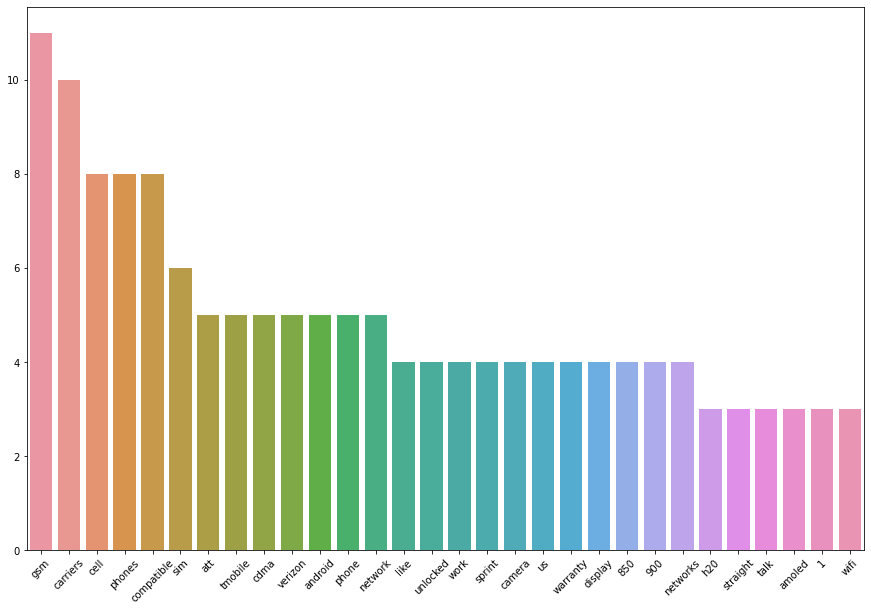

In [56]:
plt.title("Word frequency for features of top 10 phones")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
plot_word_frequency(" ".join(features).split(), 30)
plt.close(1)
plt.show()

## Certain features like amoled display, camera, wifi, android and warranty are important as they occur frequently

In [58]:

## Creating a dictionary for asin and its corresponding brand
df_byasin = df[["asin","brand_y"]].drop_duplicates(subset="asin").set_index("asin").T.to_dict("records")[0]

In [59]:
# mapping the also viewed column and asin numbers to their respective brand names

from ast import literal_eval
from collections import Counter
df["also_view_brand"]=df["also_view_y"].map(lambda asinStr: literal_eval(asinStr)).map(lambda asins: Counter() if not isinstance(asins, list) else Counter(
    filter(lambda x: x is not None, map(lambda asin: df_byasin.get(asin), asins))
))

In [60]:
## Writing a function to find the most common alternate brand a customer viewed except the brand the customer bought

def get_most_common_alt_brand(ownBrand, counter):
    try:
        most_common = counter.most_common(2)
        if most_common[0][0] == ownBrand:
            return most_common[1][0]
        else:
            return most_common[0][0]
    except IndexError:
        return None

df["most_view_alt_brand"] = df.apply(lambda x: get_most_common_alt_brand(x.brand_y, x.also_view_brand),axis=1)

## Adding a new column most_view_alt_brand which consist of the most common brand viewd by the customer other than the brand bought by the customer. We can check brand loyalty via this

In [61]:
df.head()

,description,title,also_buy,feature,rank,details,similar_item,date,asin,overall,...,unixReviewTime,reviewerID,reviewText,also_view_y,brand_y,cleaned_reviewText,review_sentiment,Date&Time,also_view_brand,most_view_alt_brand
0,"[Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone inc...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],[],"[>#3,059,436 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#4,085 in...",{},,,B0000E3GWH,1,...,2004-09-21,A5JLAU2ARJ0BO,This phone is ugly and heavy and has a terrible user interface even for techies like myself. It...,[],Samsung,phone ugly heavy terrible user interface techies like drops calls like crazy manhattan moto v600...,NEGATIVE,2004-09-20,{},None
1,"[Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone inc...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],[],"[>#3,059,436 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#4,085 in...",{},,,B0000E3GWH,4,...,2004-07-24,A1ACM1CBGORBN1,I had the Samsung V205 and then I decided to try the E715 out. FYI to people with battery proble...,[],Samsung,samsung v205 decided try e715 fyi people battery problems batteries drain completely charge like...,POSITIVE,2004-07-23,{},None
2,"[Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone inc...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],[],"[>#3,059,436 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#4,085 in...",{},,,B0000E3GWH,3,...,2004-07-06,A2V48Q03FZUOSD,This is the first Samsung phone I have had and it does not quite measure-up to the V300. I am a...,[],Samsung,samsung phone not measure v300 am tmobile customer finally fed v300's terrible camera tmobile se...,NEGATIVE,2004-05-07,{},None
3,"[Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone inc...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],[],"[>#3,059,436 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#4,085 in...",{},,,B0000E3GWH,5,...,2004-04-12,A1V3TRGWOMA8LC,"..and I'm from Europe, where the phones and networks are much better than in the States. I have ...",[],Samsung,i'm europe phones networks better samsung currently best software huge nokia fan amazingly light...,POSITIVE,2004-11-04,{},None
4,"[Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone inc...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],[],"[>#3,059,436 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#4,085 in...",{},,,B0000E3GWH,3,...,2004-02-19,A3NOBH42C7UI5M,This phone is amazingly small and light for a camera phone; it even has a flashlight/flash. Prob...,[],Samsung,phone amazingly light camera phone flashlight flash problems phone real problem 1 battery life w...,POSITIVE,2004-02-18,{},None


In [62]:
brand_loyalty=pd.pivot_table(df[df["brand_y"].isin(review_rate.index)], index="brand_y", columns="most_view_alt_brand", values="title", aggfunc="count")
brand_loyalty=brand_loyalty.fillna(0)
brand_loyalty

## This table tells us that for a brand bought by the customers which other brands were also viewed by how many customers. Like for apple no other brand was viewed so it has very high brand loyalty. 

most_view_alt_brand,AT&T,Alcatel,Apple,Asus,BLU,BlackBerry,Casio,Caterpillar,Google,GreatCall,...,RCA,Risio,Samsung,Samsung Korea,Sanyo,Sony,Sony Ericsson,Tracfone,ZTE,ZTE USA
brand_y,,,,,,,,,,,,,,,,,,,,,
Apple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BLU,0.0,26.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,...,156.0,0.0,941.0,0.0,0.0,494.0,0.0,0.0,723.0,0.0
BlackBerry,0.0,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,13.0,...,0.0,0.0,131.0,0.0,0.0,47.0,0.0,0.0,651.0,0.0
HTC,0.0,8.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,19.0,...,22.0,0.0,417.0,0.0,0.0,15.0,0.0,0.0,66.0,0.0
Huawei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,20.0,0.0,6.0,10.0,0.0
LG,0.0,50.0,0.0,13.0,101.0,106.0,0.0,0.0,87.0,6.0,...,0.0,5.0,1812.0,0.0,0.0,139.0,0.0,365.0,27.0,4.0
Motorola,0.0,0.0,0.0,0.0,37.0,210.0,0.0,0.0,0.0,26.0,...,62.0,0.0,576.0,0.0,0.0,330.0,0.0,59.0,552.0,0.0
Nokia,0.0,0.0,0.0,0.0,63.0,693.0,0.0,0.0,0.0,0.0,...,0.0,0.0,140.0,0.0,0.0,49.0,0.0,0.0,69.0,0.0
Samsung,10.0,0.0,0.0,768.0,110.0,117.0,11.0,15.0,0.0,65.0,...,13.0,0.0,0.0,60.0,11.0,111.0,0.0,34.0,1284.0,0.0


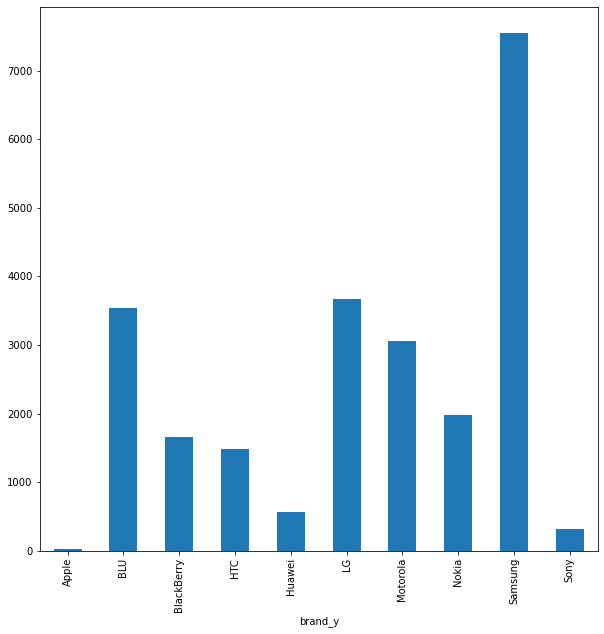

In [63]:
brand_loyalty["total_also_view"]=brand_loyalty.sum(axis=1)
plt.title("Brand Loyalty")
plt.figure(figsize=(10,10))
brand_loyalty.total_also_view.plot.bar()
plt.close(1)
plt.show()

## Model Building

In [64]:
df["review_sentiment"]=df["review_sentiment"].map({"POSITIVE":1,"NEGATIVE":0})  ## Mapping review_sentiment to binary values for better model 
df.head()

,description,title,also_buy,feature,rank,details,similar_item,date,asin,overall,...,unixReviewTime,reviewerID,reviewText,also_view_y,brand_y,cleaned_reviewText,review_sentiment,Date&Time,also_view_brand,most_view_alt_brand
0,"[Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone inc...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],[],"[>#3,059,436 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#4,085 in...",{},,,B0000E3GWH,1,...,2004-09-21,A5JLAU2ARJ0BO,This phone is ugly and heavy and has a terrible user interface even for techies like myself. It...,[],Samsung,phone ugly heavy terrible user interface techies like drops calls like crazy manhattan moto v600...,0,2004-09-20,{},None
1,"[Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone inc...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],[],"[>#3,059,436 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#4,085 in...",{},,,B0000E3GWH,4,...,2004-07-24,A1ACM1CBGORBN1,I had the Samsung V205 and then I decided to try the E715 out. FYI to people with battery proble...,[],Samsung,samsung v205 decided try e715 fyi people battery problems batteries drain completely charge like...,1,2004-07-23,{},None
2,"[Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone inc...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],[],"[>#3,059,436 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#4,085 in...",{},,,B0000E3GWH,3,...,2004-07-06,A2V48Q03FZUOSD,This is the first Samsung phone I have had and it does not quite measure-up to the V300. I am a...,[],Samsung,samsung phone not measure v300 am tmobile customer finally fed v300's terrible camera tmobile se...,0,2004-05-07,{},None
3,"[Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone inc...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],[],"[>#3,059,436 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#4,085 in...",{},,,B0000E3GWH,5,...,2004-04-12,A1V3TRGWOMA8LC,"..and I'm from Europe, where the phones and networks are much better than in the States. I have ...",[],Samsung,i'm europe phones networks better samsung currently best software huge nokia fan amazingly light...,1,2004-11-04,{},None
4,"[Compatible with T-Mobile cellular service, Samsung's dual-frequency GSM/GPRS SGH-E715 phone inc...",Samsung SGH E715 - Titanium blue (T-Mobile) Cellular Phone,[],[],"[>#3,059,436 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories), >#4,085 in...",{},,,B0000E3GWH,3,...,2004-02-19,A3NOBH42C7UI5M,This phone is amazingly small and light for a camera phone; it even has a flashlight/flash. Prob...,[],Samsung,phone amazingly light camera phone flashlight flash problems phone real problem 1 battery life w...,1,2004-02-18,{},None


In [65]:
X=df.cleaned_reviewText   ## Assigning the variables for model bulding
y=df.review_sentiment
print(X.shape)
print(y.shape)

(60855,)
(60855,)


In [66]:
# splitting into test and train

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorising the text
vect = CountVectorizer(stop_words='english')

In [68]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [70]:
vect.vocabulary_               ## Unique words in the cleaned reviewText column

{'excelente': 12422,
 'love': 19206,
 'phone': 23422,
 'size': 28425,
 'speed': 29195,
 'sound': 29046,
 'pictures': 23548,
 'videos': 33452,
 'look': 19117,
 'great': 14975,
 'built': 6557,
 'stylus': 29944,
 'excelent': 12421,
 'got': 14810,
 'motorola': 20731,
 'flip': 13527,
 'ago': 3197,
 'spare': 29104,
 'cellphone': 7223,
 'stopped': 29727,
 'finally': 13285,
 'using': 33092,
 'identical': 16397,
 'phones': 23451,
 'like': 18832,
 'w408g': 33709,
 'purchased': 24890,
 'locally': 19036,
 'cheaper': 7398,
 'worked': 34539,
 'calls': 6862,
 'taking': 30622,
 'photo': 23474,
 'periodically': 23260,
 'work': 34529,
 'easy': 11441,
 'looks': 19127,
 'nice': 21449,
 'decent': 9745,
 'navigate': 21192,
 'menu': 20006,
 'bad': 5124,
 'pity': 23649,
 'cost': 8919,
 'belly': 5558,
 'hope': 16001,
 'stars': 29536,
 'month': 20629,
 'seen': 27674,
 'blackberry': 5780,
 'quick': 25117,
 'fix': 13395,
 'till': 31383,
 'upgrade': 32963,
 'slim': 28580,
 'light': 18806,
 'ips': 17487,
 'screen':

In [71]:
vect.get_feature_names()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '0000',
 '000000',
 '00001',
 '000kbps',
 '000ma',
 '000mah',
 '001',
 '002',
 '003395',
 '004',
 '005',
 '008g',
 '009',
 '00am',
 '00b29',
 '00m8rkbp818pftfvrsc5',
 '00p',
 '00pm',
 '00r_mpap',
 '00x2',
 '01',
 '0100',
 '011',
 '012',
 '014',
 '0155379',
 '01cents',
 '01fhslqo9ss',
 '01gb',
 '01uel',
 '02',
 '020',
 '0204',
 '022',
 '024x1',
 '0251',
 '02733p4',
 '02736c7',
 '02mm',
 '03',
 '032g',
 '0385344554',
 '03mbps',
 '04',
 '0400',
 '043',
 '0430',
 '046',
 '04754bbx2bt8deb8yb50',
 '05',
 '050',
 '0500',
 '05oct11',
 '06',
 '06072012',
 '0610',
 '06272012',
 '0630',
 '064g',
 '069',
 '06a2f3c5ca',
 '07',
 '0700',
 '07932',
 '07gb',
 '07mpixel',
 '08',
 '080',
 '09',
 '0a',
 '0c',
 '0ce',
 '0ghz',
 '0hd',
 '0ii',
 '0in',
 '0inch',
 '0lte',
 '0marshmallow',
 '0mp',
 '0no',
 '0s',
 '0vrg',
 '0x',
 '0x0',
 '0x1',
 '0xx',
 '10',
 '100',
 '1000',
 '10000',
 '10000mah',
 '1000ma',
 '1003',
 '10050',
 '10073',
 '100g',
 '100gb',
 '100k',
 '100kbps',
 '100mah',
 '100mb

In [72]:
# transforming test and train data
X_train_transformed = vect.transform(X_train)
X_test_tranformed =vect.transform(X_test)

In [73]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_tranformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.519652951229131

In [74]:
bnb

BernoulliNB()

In [75]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[3372,  569],
       [6739, 4534]], dtype=int64)

In [76]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[3372  569]
 [6739 4534]]


In [77]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.40219994677548127


In [78]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.8556204009134737


In [79]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.8884969625710366
0.8884969625710366


In [80]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.8884969625710366
PRECISION SCORE : 0.8884969625710366
RECALL SCORE : 0.40219994677548127
F1 SCORE : 0.5537371763556423


In [81]:
y_pred_proba

array([[2.79104966e-58, 1.00000000e+00],
       [9.99999871e-01, 1.28771483e-07],
       [9.99972010e-01, 2.79900279e-05],
       ...,
       [9.99960701e-01, 3.92994577e-05],
       [1.91854623e-07, 9.99999808e-01],
       [9.99952386e-01, 4.76139568e-05]])

In [82]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

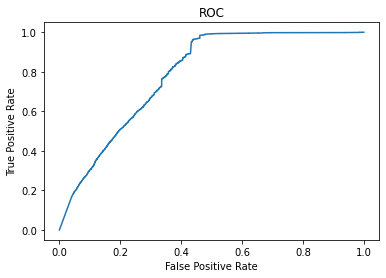

In [83]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)